# Deep Learning Intro 2

Feed Forward Network ~ function composition

Tensorflow -- make computations given the computational network -- cnw ~ tensor computations

<img src="./neuron_model.jpeg"  width="50%">

keras ~ wrapper

In [1]:
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers import Dropout, Lambda, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import keras.backend as K

from keras.optimizers import Adam

import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
#set up random seed for debugging
np.random.seed(666)

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print "category of first stuff:", Y_train[0]

category of first stuff: 9


In [4]:
#normalize stuff
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
#save last 20% from x_train, y_train for validation set (for model tuning)
val_size = len(X_train) // 5
x_val = X_train[-val_size:]
y_val = Y_train[-val_size:]
x_train = X_train[:-val_size]
y_train = Y_train[:-val_size]

# add extra channel dimension
x_train = np.expand_dims(x_train, 3)
X_test = np.expand_dims(X_test, 3)
x_val = np.expand_dims(x_val, 3)

print("Train data shape ", x_train.shape)
print("Train label shape ", y_train.shape)
print("Validation data shape ", x_val.shape)
print("Validation label shape ", y_val.shape)
print("Test data shape ", X_test.shape)
print("Test label shape ", Y_test.shape)

('Train data shape ', (48000, 28, 28, 1))
('Train label shape ', (48000,))
('Validation data shape ', (12000, 28, 28, 1))
('Validation label shape ', (12000,))
('Test data shape ', (10000, 28, 28, 1))
('Test label shape ', (10000,))


3x3 filters + 1 bias value acting on the 28x28 image  
32 kernel used --> 32 x (3x3+1) = 320




**Relu**


**Sigmoid**


**Softmax**


**Dropout**  
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

**Batch Size**  
Batch size defines number of samples that going to be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up batch_size equal to 100. Algorithm takes first 100 samples (from 1st to 100th) from the training dataset and trains network. Next it takes second 100 samples (from 101st to 200th) and train network again. We can keep doing this procedure until we will propagate through the networks all samples. The problem usually happens with the last set of samples. In our example we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get final 50 samples and train the network.

Advantages:

* It requires less memory. Since you train network using less number of samples the overall training procedure requires less memory. It's especially important in case if you are not able to fit dataset in memory.

* Typically networks trains faster with mini-batches. That's because we update weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

Disadvantages:

* The smaller the batch the less accurate estimate of the gradient.

In the neural network terminology:

* one epoch = one forward pass and one backward pass of all the training examples
* batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
* number of iterations = number of passes, each pass using `batch size` number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).


In [6]:
INPUT_SHAPE=x_train.shape[1:]
BATCH_SIZE = 512

# CNN with 1 Convolutional Layer
SEQUENTIAL=False
if SEQUENTIAL:
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), #<------------- one convolutional layer, could also specify initionalizer method, padding, 
        activation='relu', 
        input_shape=INPUT_SHAPE),
        MaxPooling2D(pool_size=(2, 2)),#<------------- 2x2 max polling
        Dropout(0.2),#<------------------------------- a regularization technique for neural network models
        Flatten(), #<--------------------------------- flatten the box at the end
        Dense(128, activation='relu'),#<-------------- dense layers do the segmentation
        Dense(10, activation='softmax')
    ])
else: # alternative creation of the model using the functional api
    inputs = Input(shape=INPUT_SHAPE)
    output = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
    output = MaxPooling2D(pool_size=(2, 2)) (output)
    output = Dropout(0.2) (output)
    output = Flatten() (output)
    output = Dense(128, activation='relu') (output)
    output = Dense(10, activation='softmax') (output)
    model = Model(inputs, output)


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [7]:
#adam is a momentum minimzer, lr is a hyperparameter (learning rate)
#we could use L2 distance as the error, but instead we use chategirical cross entropy
    #there is a bunch defined in the keras documentation
    #or u can write your own function
    
#accuracy is not the same as the loss function! - it is not differentiable --> back prop does not work

model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
"""
use data augmentation
"""
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

batches = gen.flow(x_train, y_train, batch_size=BATCH_SIZE)
val_gen = ImageDataGenerator()
val_batches = val_gen.flow(x_val, y_val, batch_size=BATCH_SIZE)

In [9]:
#the back propagation doesnt happen after evaluating in 80000 points
#happens in groups of batch_size
#epoch tell how many rounds we teach

#we give it the validation data for the verbose to be able to show the result


#stochastic batch (random batching) gradient descend
#there is some indeterministic tensorflow optimization descisions --> even with the seed fixed the result is different


BATCH_SIZE = 512
NB_EPOCHS = 20



history1 = model.fit_generator(batches, 
                               steps_per_epoch=48000//BATCH_SIZE, 
                               epochs=20, 
                               validation_data=val_batches, 
                               validation_steps=12000//BATCH_SIZE)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Reduce the learning rate and continue training
K.set_value(model.optimizer.lr, 0.0001)

history2 = model.fit_generator(batches, 
                               steps_per_epoch=48000//BATCH_SIZE, 
                               epochs=20, 
                               validation_data=val_batches, 
                               validation_steps=12000//BATCH_SIZE)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Reduce the learning rate and continue training
K.set_value(model.optimizer.lr, 0.00001)

history3 = model.fit_generator(batches, 
                               steps_per_epoch=48000//BATCH_SIZE, 
                               epochs=20, 
                               validation_data=val_batches, 
                               validation_steps=12000//BATCH_SIZE)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
93/93 [==============================] - 14s 148ms/step - loss: 0.8268 - acc: 0.7028 - val_loss: 0.5672 - val_acc: 0.7855
Epoch 2/20
93/93 [==============================] - 14s 147ms/step - loss: 0.5890 - acc: 0.7814 - val_loss: 0.4933 - val_acc: 0.8139
Epoch 3/20
93/93 [==============================] - 14s 146ms/step - loss: 0.5375 - acc: 0.8012 - val_loss: 0.4469 - val_acc: 0.8385
Epoch 4/20
93/93 [==============================] - 14s 147ms/step - loss: 0.5033 - acc: 0.8154 - val_loss: 0.4268 - val_acc: 0.8457
Epoch 5/20
93/93 [==============================] - 14s 146ms/step - loss: 0.4777 - acc: 0.8253 - val_loss: 0.4078 - val_acc: 0.8522
Epoch 6/20
93/93 [==============================] - 14s 147ms/step - loss: 0.4514 - acc: 0.8314 - val_loss: 0.3802 - val_acc: 0.8651
Epoch 7/20
93/93 [==============================] - 14s 147ms/step - loss: 0.4359 - acc: 0.8396 - val_loss: 0.3720 - val_acc: 0.8653
Epoch 8/20
93/93 [==============================] - 14s 148ms/step - 

In [10]:
#test our results

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.2843619262814522)
('Test accuracy:', 0.9008)


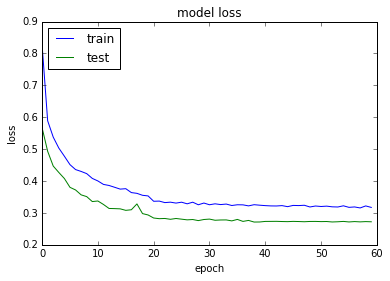

In [11]:
plt.plot(history1.history['loss'] + history2.history['loss'] + history3.history['loss'])
plt.plot(history1.history['val_loss'] + history2.history['val_loss'] + history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

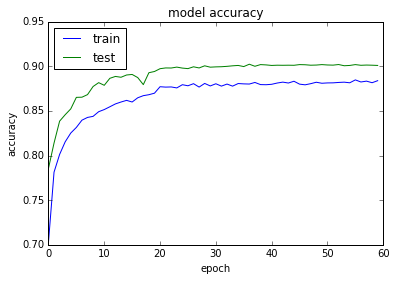

In [12]:
plt.plot(history1.history['acc'] + history2.history['acc'] + history3.history['acc'])
plt.plot(history1.history['val_acc'] + history2.history['val_acc'] + history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')